<a href="https://colab.research.google.com/github/NeshPk/NeshPk/blob/main/LearningCreditInformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit information learning

---



> ### [Question 1] Confirmation of the content of the competition

---



**- What to learn and what to predict?**

Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

**- What kind of file to create and submit to Kaggle?**

For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

```
SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2
etc.
```

**- What kind of index value will the submitted work be evaluated by?**

Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

> ### [Question 2] Learning and verification

---



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv('application_train.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.shape

(221341, 122)

**Checking missing data and dropping column with missing data**

In [10]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
data = pd.concat([total,percent], axis=1, keys=['Total','Percentage'])
data

,Total,Percentage
COMMONAREA_AVG,154845,0.699577
COMMONAREA_MODE,154845,0.699577
COMMONAREA_MEDI,154845,0.699577
NONLIVINGAPARTMENTS_MEDI,153758,0.694666
NONLIVINGAPARTMENTS_MODE,153758,0.694666
...,...,...
FLAG_OWN_REALTY,0,0.000000
CODE_GENDER,0,0.000000
FLAG_OWN_CAR,0,0.000000
AMT_CREDIT,0,0.000000


In [11]:
features = data[data.Percentage < 0.1]
features

,Total,Percentage
NAME_TYPE_SUITE,915,0.004134
DEF_60_CNT_SOCIAL_CIRCLE,726,0.003280
OBS_60_CNT_SOCIAL_CIRCLE,726,0.003280
DEF_30_CNT_SOCIAL_CIRCLE,726,0.003280
OBS_30_CNT_SOCIAL_CIRCLE,726,0.003280
...,...,...
FLAG_OWN_REALTY,0,0.000000
CODE_GENDER,0,0.000000
FLAG_OWN_CAR,0,0.000000
AMT_CREDIT,0,0.000000


In [12]:
features.index

Index(['NAME_TYPE_SUITE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE',
       'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE',
       'REGION_POPULATION_RELATIVE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'LIVE_REGION_NOT_WORK_REGION',
       'FLAG_EMAIL', 'FLAG_WORK_PHONE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'FLAG_CONT_MOBILE', 'FLAG_EMP_PHONE',
       'WEEKDAY_APPR_PROCESS_START', 'FLAG_PHONE', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'REG_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE', 'DAYS_BIRTH',
       'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT

In [13]:
df1 = df[features.index]
df1.head()

,NAME_TYPE_SUITE,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,...,SK_ID_CURR,AMT_INCOME_TOTAL,NAME_CONTRACT_TYPE,NAME_INCOME_TYPE,CNT_CHILDREN,FLAG_OWN_REALTY,CODE_GENDER,FLAG_OWN_CAR,AMT_CREDIT,TARGET
0,Unaccompanied,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,...,100002,202500.0,Cash loans,Working,0,Y,M,N,406597.5,1
1,Family,0.0,1.0,0.0,1.0,0.622246,1129500.0,35698.5,2.0,-828.0,...,100003,270000.0,Cash loans,State servant,0,N,F,N,1293502.5,0
2,Unaccompanied,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,...,100004,67500.0,Revolving loans,Working,0,Y,M,Y,135000.0,0
3,Unaccompanied,0.0,2.0,0.0,2.0,0.650442,297000.0,29686.5,2.0,-617.0,...,100006,135000.0,Cash loans,Working,0,Y,F,N,312682.5,0
4,Unaccompanied,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,...,100007,121500.0,Cash loans,Working,0,Y,M,N,513000.0,0


**Plot the target proportion**

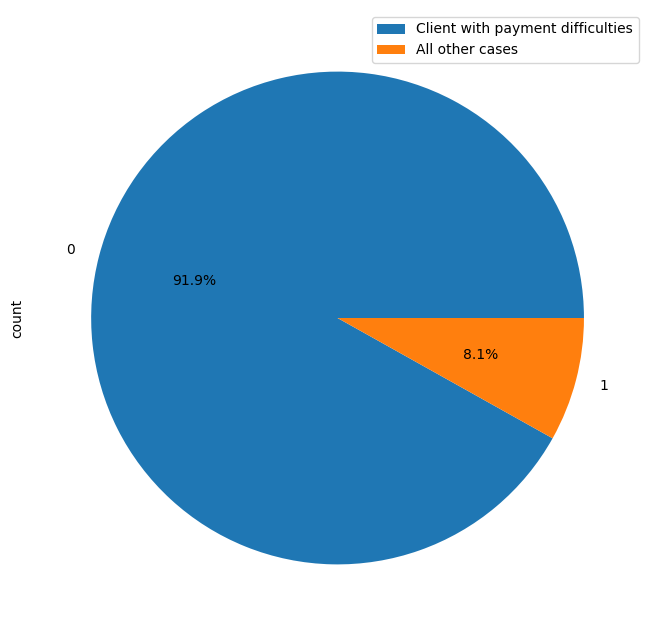

In [14]:
tg = df["TARGET"].value_counts()
plt.subplots(figsize=(12,8))
pie_target = tg.plot.pie(autopct="%.1f%%")
pie_target.legend(loc=1, labels={'Client with payment difficulties': 0, 'All other cases': 1})
plt.show()

In [15]:
def dummy_variable_all(df, sort_frequence=True, dropna=True, map_show=False, skip_column=[]):
    for column_name in df:
        if np.dtype(df[column_name]) == 'O' and column_name not in skip_column:
            if sort_frequence:
                unique_value = df[column_name].value_counts(dropna=dropna).sort_values().index
            else:
                unique_value = df[column_name].value_counts(dropna=dropna).sort_index().index
            name_map = {}
            for i, value in enumerate(unique_value):
                name_map[value] = i
            if map_show:
                print('column_name :', column_name)
                print('replace :', name_map)
            df[column_name] = df[column_name].map(name_map)
    return df

In [16]:
df2 = dummy_variable_all(df.copy(), dropna=False, map_show=True)
df2.fillna(df2.median(), inplace=True)

column_name : NAME_CONTRACT_TYPE
replace : {'Revolving loans': 0, 'Cash loans': 1}
column_name : CODE_GENDER
replace : {'XNA': 0, 'M': 1, 'F': 2}
column_name : FLAG_OWN_CAR
replace : {'Y': 0, 'N': 1}
column_name : FLAG_OWN_REALTY
replace : {'N': 0, 'Y': 1}
column_name : NAME_TYPE_SUITE
replace : {'Group of people': 0, 'Other_A': 1, nan: 2, 'Other_B': 3, 'Children': 4, 'Spouse, partner': 5, 'Family': 6, 'Unaccompanied': 7}
column_name : NAME_INCOME_TYPE
replace : {'Commercia': 0, 'Maternity leave': 1, 'Businessman': 2, 'Student': 3, 'Unemployed': 4, 'State servant': 5, 'Pensioner': 6, 'Commercial associate': 7, 'Working': 8}
column_name : NAME_EDUCATION_TYPE
replace : {nan: 0, 'Academic degree': 1, 'Lower secondary': 2, 'Incomplete higher': 3, 'Higher education': 4, 'Secondary / secondary special': 5}
column_name : NAME_FAMILY_STATUS
replace : {nan: 0, 'Unknown': 1, 'Widow': 2, 'Separated': 3, 'Civil marriage': 4, 'Single / not married': 5, 'Married': 6}
column_name : NAME_HOUSING_TYPE


In [17]:
pd.set_option('display.max_columns', None)
df2

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,1,1,1,1,0,202500.0,406597.5,24700.5,351000.0,7,8,5,5,6,0.018801,-9461.0,-637.0,-3648.0,-2120.0,9.0,1.0,1.0,0.0,1.0,1.0,0.0,17,1.0,2.0,2.0,6,10.0,0.0,0.0,0.0,0.0,0.0,0.0,58,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,3,2,0.0149,5,2,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,1,2,1,0,0,270000.0,1293502.5,35698.5,1129500.0,6,5,4,6,6,0.003541,-16765.0,-1188.0,-1186.0,-291.0,9.0,1.0,1.0,0.0,1.0,1.0,0.0,15,2.0,1.0,1.0,5,11.0,0.0,0.0,0.0,0.0,0.0,0.0,51,0.311267,0.622246,0.535276,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,3,2,0.0714,4,2,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,1,0,1,0,67500.0,135000.0,6750.0,135000.0,7,8,5,5,6,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1.0,1.0,1.0,1.0,1.0,0.0,17,1.0,2.0,2.0,5,9.0,0.0,0.0,0.0,0.0,0.0,0.0,52,0.505505,0.555912,0.729567,0.0876,0.0763,0.9816,0.7552,0.0210,0.00,0.1379,0.1667,0.2083,0.0483,0.0756,0.0746,0.0000,0.0036,0.0840,0.0746,0.9816,0.7648,0.0190,0.0000,0.1379,0.1667,0.2083,0.0459,0.0771,0.0731,0.0,0.0011,0.0874,0.0759,0.9816,0.7585,0.0207,0.00,0.1379,0.1667,0.2083,0.0487,0.0761,0.0750,0.0000,0.0030,4,3,0.0688,7,1,0.0,0

In [18]:
df2.dtypes.value_counts()

,count
float64,103
int64,19


**Get the correlation**

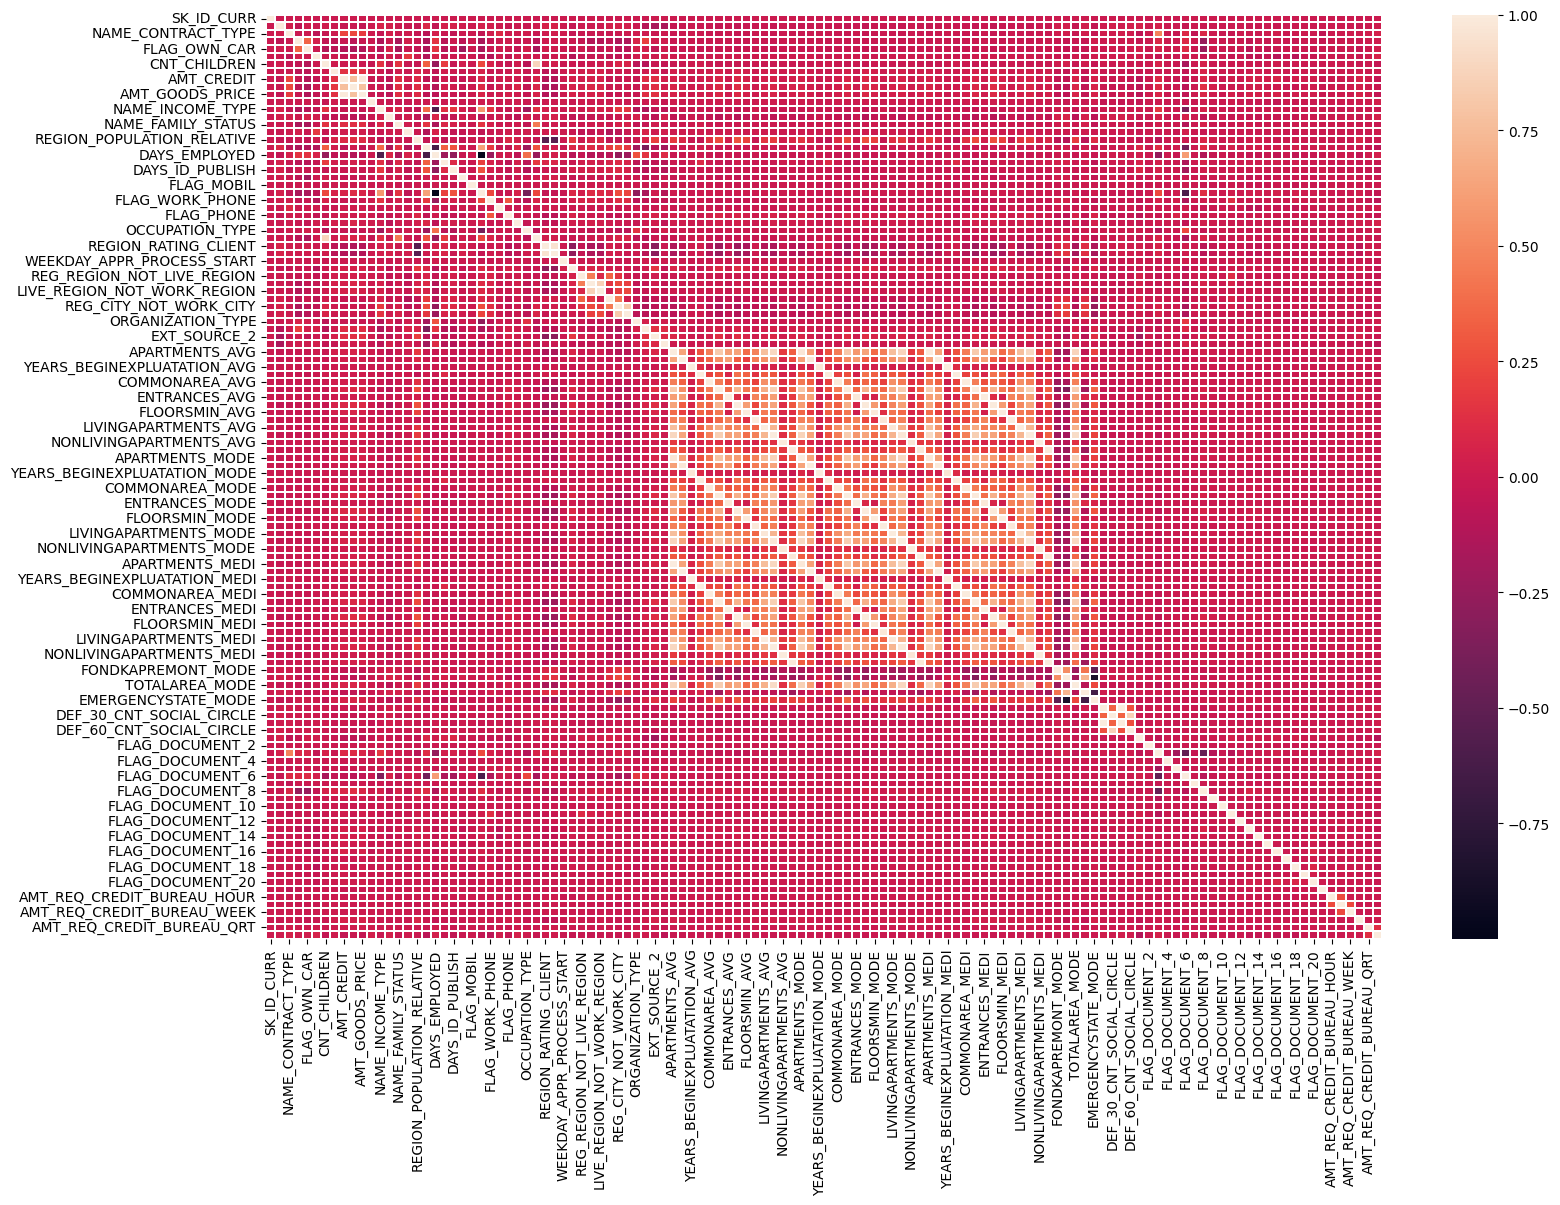

In [19]:
corr = df2.corr()

plt.subplots(figsize=(18, 12))
sns.heatmap(corr, linewidth=0.1)
plt.show()

In [20]:
target_corr = abs(corr['TARGET'].copy().drop(index=['TARGET'])).sort_values(ascending=False)
target_corr

,TARGET
EXT_SOURCE_2,0.160941
EXT_SOURCE_3,0.154445
EXT_SOURCE_1,0.098037
DAYS_BIRTH,0.078395
REGION_RATING_CLIENT_W_CITY,0.060549
...,...
ORGANIZATION_TYPE,0.000583
FLAG_DOCUMENT_20,0.000458
FLAG_CONT_MOBILE,0.000373
FLAG_DOCUMENT_19,0.000104


**Extracting the data**

In [21]:
X = df2[df2.columns.copy().drop('TARGET')].values
y = df2['TARGET'].values
print(X.shape, y.shape)

(221341, 121) (221341,)


In [22]:
#Select features according to the k highest scores

from sklearn.feature_selection import SelectKBest, f_classif
X_select = SelectKBest(f_classif, k=2).fit_transform(X, y)
print(X_select)

[[0.26294859 0.13937578]
 [0.62224578 0.53527625]
 [0.55591208 0.72956669]
 ...
 [0.6635878  0.53527625]
 [0.75424002 0.74218161]
 [0.56572505 0.53527625]]


In [ ]:
# Get the name of selected features
selected_features = []
for i in df2.columns:
    if all(df2.loc[:, i] == X_select[:, 0]) or all(df2.loc[:, i] == X_select[:, 1]):
        selected_features.append(i)
print(selected_features)

['EXT_SOURCE_2', 'EXT_SOURCE_3']


In [ ]:
objects = df1.select_dtypes(include=[object])
objects

,NAME_TYPE_SUITE,ORGANIZATION_TYPE,WEEKDAY_APPR_PROCESS_START,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,CODE_GENDER,FLAG_OWN_CAR,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE
0,Unaccompanied,Business Entity Type 3,WEDNESDAY,House / apartment,Single / not married,M,N,Cash loans,Y,Working,Secondary / secondary special
1,Family,School,MONDAY,House / apartment,Married,F,N,Cash loans,N,State servant,Higher education
2,Unaccompanied,Government,MONDAY,House / apartment,Single / not married,M,Y,Revolving loans,Y,Working,Secondary / secondary special
3,Unaccompanied,Business Entity Type 3,WEDNESDAY,House / apartment,Civil marriage,F,N,Cash loans,Y,Working,Secondary / secondary special
4,Unaccompanied,Religion,THURSDAY,House / apartment,Single / not married,M,N,Cash loans,Y,Working,Secondary / secondary special
...,...,...,...,...,...,...,...,...,...,...,...
11626,Unaccompanied,Business Entity Type 2,WEDNESDAY,House / apartment,Civil marriage,M,N,Cash loans,N,Commercial associate,Higher education
11627,Unaccompanied,Transport: type 4,WEDNESDAY,House / apartment,Single / not married,F,N,Cash loans,Y,Commercial associate,Secondary / secondary special
11628,Unaccompanied,XNA,THURSDAY,House / apartment,Married,M,N,Cash loans,Y,Pensioner,Secondary / secondary special
11629,Unaccompanied,Agriculture,FRIDAY,House / apartment,Single / not married,M,N,Cash loans,Y,Working,Secondary / secondary special


In [ ]:
objects.isna().sum()

NAME_TYPE_SUITE               46
ORGANIZATION_TYPE              1
WEEKDAY_APPR_PROCESS_START     1
NAME_HOUSING_TYPE              1
NAME_FAMILY_STATUS             1
CODE_GENDER                    0
FLAG_OWN_CAR                   0
NAME_CONTRACT_TYPE             0
FLAG_OWN_REALTY                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
dtype: int64

In [ ]:
df1['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      9421
Family             1539
Spouse, partner     408
Children            127
Other_B              57
Other_A              24
Group of people       9
Name: NAME_TYPE_SUITE, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_select, y, train_size=0.75, test_size=0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8723, 2) (2908, 2) (8723,) (2908,)


In [ ]:
# Standardizing the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Compare unstandardized and standardized data
print(X_train)
print(X_train_scaled)
print(X_test)
print(X_test_scaled)

[[0.40704317 0.53706996]
 [0.68918579 0.49566583]
 [0.05653262 0.76623367]
 ...
 [0.5246867  0.58148371]
 [0.6695124  0.49927202]
 [0.39926642 0.50648424]]
[[-0.56657972  0.11833985]
 [ 0.91454934 -0.11818249]
 [-2.40661139  1.4274445 ]
 ...
 [ 0.05099888  0.37205473]
 [ 0.81127241 -0.09758205]
 [-0.60740437 -0.056382  ]]
[[0.24047153 0.53527625]
 [0.31008717 0.07495928]
 [0.64672855 0.53527625]
 ...
 [0.6829028  0.61952771]
 [0.6567097  0.74766339]
 [0.32605953 0.22009464]]
[[-1.44101015  0.10809324]
 [-1.0755576  -2.52148141]
 [ 0.69166685  0.10809324]
 ...
 [ 0.88156632  0.58938224]
 [ 0.74406366  1.32136121]
 [-0.99170946 -1.69239124]]


**Create function to calculate all scores/evaluations**

In [ ]:
from sklearn.metrics import *

def evaluation(test, predict):
    acc_score = accuracy_score(test, predict)
    prec_score = precision_score(test, predict)
    rec_score = recall_score(test, predict)
    f_score = f1_score(test, predict)
    conf_matrix = confusion_matrix(test, predict)
    print('Accuracy : {:.3f}'.format(acc_score))
    print('Precision: {:.3f}'.format(prec_score))
    print('Recall   : {:.3f}'.format(rec_score))
    print('F        : {:.3f}'.format(f_score))
    print('Confusion matrix:\n', conf_matrix)

In [ ]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_scaled, y_train)
predict_3 = neigh.predict(X_test_scaled)
evaluation(y_test, predict_3)

Accuracy : 0.901
Precision: 0.165
Recall   : 0.066
F        : 0.094
Confusion matrix:
 [[2605   76]
 [ 212   15]]


In [ ]:
# DecisionTree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train_scaled, y_train)
dtree_predict = dtree.predict(X_test_scaled)
evaluation(y_test, dtree_predict)

Accuracy : 0.863
Precision: 0.121
Recall   : 0.119
F        : 0.120
Confusion matrix:
 [[2484  197]
 [ 200   27]]


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

r_forest = RandomForestClassifier()
r_forest.fit(X_train_scaled, y_train)
r_forest_predict = r_forest.predict(X_test_scaled)
evaluation(y_test, r_forest_predict)

Accuracy : 0.903
Precision: 0.219
Recall   : 0.093
F        : 0.130
Confusion matrix:
 [[2606   75]
 [ 206   21]]


In [ ]:
# Calibrated probabilities of the above classifications
neigh_prob = neigh.predict_proba(X_test_scaled)
print("KNeighbors Classifier probas:")
print(neigh_prob)

dtree_prob = dtree.predict_proba(X_test_scaled)
print("DecisionTree probas:")
print(dtree_prob)

r_forest_prob = r_forest.predict_proba(X_test_scaled)
print("Random Forest probas:")
print(r_forest_prob)

KNeighbors Classifier probas:
[[1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [0.33333333 0.66666667]]
DecisionTree probas:
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]
Random Forest probas:
[[0.84 0.16]
 [0.84 0.16]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [1.   0.  ]
 [0.27 0.73]]


In [ ]:
# The average probability of all the above classifiers

average_prob = (neigh_prob + dtree_prob + r_forest_prob) / 3
average_prob

array([[0.94666667, 0.05333333],
       [0.94666667, 0.05333333],
       [1.        , 0.        ],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.20111111, 0.79888889]])

> ### [Problem 3] Estimation for test data

---



In [ ]:
df_test = pd.read_csv('application_test.csv')
df_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
3

In [ ]:
X_test_file = df_test[selected_features].values

In [ ]:
# standardize the data
X_test_file_scaled = scaler.transform(X_test_file)
X_test_file_scaled

array([[ 1.44196666, -2.03842836],
       [-1.17231587, -0.47638192],
       [ 0.97020031,  0.54061791],
       ...,
       [-2.09448627, -0.06668123],
       [ 1.37432851,  0.47169561],
       [ 1.19366569,  0.63720922]])

In [ ]:
X_test_file_scaled_finite = X_test_file_scaled[np.all(np.isfinite(X_test_file_scaled), axis=1)]
## This above line is there to remove any rows from our X_test_file_scaled dataset that contain nan or nonfinite values.

neigh_prob = neigh.predict_proba(X_test_file_scaled_finite)

dtree_prob = dtree.predict_proba(X_test_file_scaled_finite)
r_forest_prob = r_forest.predict_proba(X_test_file_scaled_finite)
average_prob = (neigh_prob + dtree_prob + r_forest_prob) / 3
predict_res = 1 - average_prob[:, 0]

In [ ]:
pred = pd.Series(predict_res, name='TARGET')
final = pd.concat([df_test['SK_ID_CURR'], pred], axis=1)
final

,SK_ID_CURR,TARGET
0,100001,0.006667
1,100005,0.631111
2,100013,0.016667
3,100028,0.006667
4,100038,0.036667
...,...,...
13496,197806,NaN
13497,197808,NaN
13498,197812,NaN
13499,197813,NaN


In [ ]:
final.to_csv('final_output_csv_file.csv', index=False)

In [ ]:
pd.read_csv('final_output_csv_file.csv')

,SK_ID_CURR,TARGET
0,100001,0.006667
1,100005,0.631111
2,100013,0.016667
3,100028,0.006667
4,100038,0.036667
...,...,...
13496,197806,NaN
13497,197808,NaN
13498,197812,NaN
13499,197813,NaN


> ### [Problem 4] Feature engineering

---



**- Which features to use:**

We chose `DAYS_BIRTH` and `REGION_RATING_CLIENT_W_CITY` as the feature to use in this assignment. They are chosen by **`sklearn.feature_selection`** with the scoring function `f_classif` used for classification only.

**- How to pre-process:**

- Remove the columns with missing value(s) and the columns that represents little in the real world.
- Visualize some statistics from the data.
- Change string value to dummy data.